# Decision Tree on Titanic Dataset.
**DV : Survived**

**IDV : Age, Gender, fare**

In [2]:
import pandas as pd
from sklearn import tree
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('/home/bk/Desktop/mlai/Notes/Day 24/train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
dataset.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [6]:
dataset.Age.value_counts()

45.00    189
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

In [7]:
dataset.Age.isna().sum()

0

In [8]:
dataset.Fare.isna().sum()

0

In [9]:
dataset.shape

(889, 12)

In [10]:
dataset.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
884    27.0
885    19.0
886    45.0
887    26.0
888    32.0
Name: Age, Length: 889, dtype: float64

In [11]:
dataset.Age.value_counts

<bound method IndexOpsMixin.value_counts of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
884    27.0
885    19.0
886    45.0
887    26.0
888    32.0
Name: Age, Length: 889, dtype: float64>

In [12]:
label_encoder = preprocessing.LabelEncoder()
dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])

In [13]:
dataset.Sex.value_counts()

1    577
0    312
Name: Sex, dtype: int64

In [14]:
independent = dataset[['Sex','Age','Fare']]
dependent = dataset[['Survived']]

In [21]:
tree_model = tree.DecisionTreeClassifier(max_depth=8)

In [22]:
tree_model.fit(X = independent, y = dependent)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
with open('Dtree_titanic.dot','w') as f:
    f = tree.export_graphviz(tree_model, feature_names=['Sex','Age','Fare'],out_file=f)

In [24]:
tree_model.score(X = independent, y = dependent)

0.8706411698537683

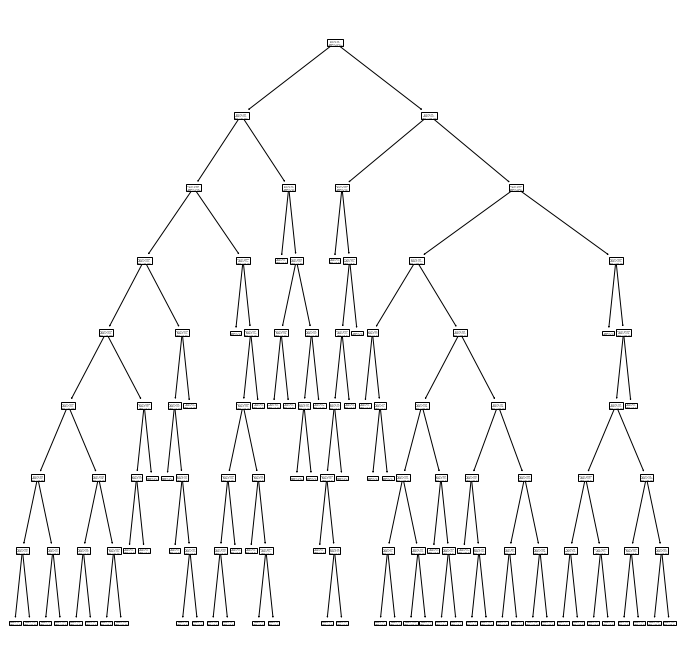

In [28]:
plt.figure(figsize=(12,12))
tree.plot_tree(tree_model)
plt.show()

# Inferences/Rules

1. 1 female passenger with fare greater than 48.2 Dollars and age less than 8 years did'nt survived.


2. 8 male passengers with age less than 6.5 years and fare less than 20.82 dollars survived.

3. 4 male passengers with age greater than 6.5 years and fare less than 26.46 dollars survived.
4. 2 male passengers with age greater than 6.5 years and fare greater than 387.66 dollars survived.
5. 4 female passengers with fare less than 28.85 dollars did'nt survived.
6. 2 male passengers with age less than 6.5 years and fare greater than 64.37 dollars survived.
7. 2 female passengers with fare greater than 44.24 dollars did'nt survived.
8. 22 female passengers with fare less than 69.42 dollars and age greater than 8 years survived.
